Importing the packages

In [1]:
import numpy as np
import pandas as pd
from sklearn_extra.cluster import KMedoids
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from itertools import islice
from sklearn.metrics.pairwise import euclidean_distances
import random
import warnings
import math
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=DeprecationWarning)
from training import models_train
from testing import models_test,models_test_approach_2


Datasets PreProcessing

In [2]:
def breast_cancer(df):
    
    df=df.drop('Unnamed: 32',axis=1)
    labels=df['diagnosis']
    data=df.drop('id',axis=1)
    data = data.drop('diagnosis', axis=1)
    labels = labels.map({'B': 0, 'M': 1})
    data['labels']=labels
    return data   

In [3]:
def heart_disease(df):
    random.seed(2411)
    df.cp = pd.Categorical(df.cp)
    df.restecg = pd.Categorical(df.restecg)
    df.slope = pd.Categorical(df.slope)
    df.ca = pd.Categorical(df.ca)
    df.thal = pd.Categorical(df.thal)

    df = pd.get_dummies(df, drop_first=True)

    df = df[['age', 'sex', 'trestbps', 'chol', 'fbs', 'thalach', 'exang', 'oldpeak',
             'cp_1', 'cp_2', 'cp_3', 'restecg_1', 'restecg_2', 'slope_1',
             'slope_2', 'ca_1', 'ca_2', 'ca_3', 'ca_4', 'thal_1', 'thal_2',
             'thal_3','target']]
    return df

In [4]:
def liver_disease(df):
    data2 = df.copy(deep=True)
    numerical_features = data2.drop(['Dataset', 'Gender'], axis=1)
    label = data2.Dataset.map({1:0, 2:1})
    numerical_features.Albumin_and_Globulin_Ratio.fillna(0, inplace=True)
    scaler = StandardScaler()
    scaled = scaler.fit_transform(numerical_features)
    dataframe = pd.DataFrame(scaled, columns=numerical_features.columns)
    dataframe['Gender'] = data2.Gender
    data3 = pd.get_dummies(dataframe)
    data3['labels']=label
    
    return data3

Clustering

In [5]:
def clustering(df,dataset,num_of_clusters):
    random.seed(2411)
    print(df.index)
    persons=[]
    if dataset == "heart_disease":
        new_df = df.drop('target', axis=1)
    elif dataset == "breast_cancer":
        new_df = df.drop('labels', axis=1)
        
    elif dataset == "liver_disease":
        new_df = df.drop('labels', axis=1)
    
    elif dataset == "thyroid":
        new_df = df.drop('classes', axis=1)
    elif dataset == "diabetes":
        new_df = df.drop('Outcome', axis=1)
        
    
    km = KMedoids(n_clusters=num_of_clusters)
    km = km.fit(new_df)
    cluster_centers = km.cluster_centers_
    transform_centers=km.transform(cluster_centers)

    #print("Cluster Centers",cluster_centers)
    #print("Transform_centers:",transform_centers)

    
    for j in range(num_of_clusters):
        l = [df.iloc[i] for i in range(len(new_df)) if km.labels_[i]==j]
        ldf = pd.DataFrame(l)
        
        persons.append(ldf)
    
  
    
    test_centers, train_centers = np.split(cluster_centers, [int(0.3 * len(cluster_centers))])
    tmp = [persons.pop() for _ in range(int(0.8*len(persons)))]
    test,train = persons, [tmp.pop() for _ in range(len(tmp))]
    return test_centers, train_centers,train,test,km

Train_Test Split

In [6]:
def train_test_split_dataset_personalized(dataset,new_df2):
    
    random.seed(2411)
    if dataset == "breast_cancer":
        X = new_df2.iloc[:,0:30]
        Y = new_df2.iloc[:,30]
        Y=Y.astype('int')
        
    elif dataset == "heart_disease":
        X = new_df2.iloc[:,0:22]
        Y = new_df2.iloc[:,22]
        Y=Y.astype('int')
        
    elif dataset == "liver_disease":
        X = new_df2.iloc[:,0:11]
        Y = new_df2.iloc[:,11]
        Y=Y.astype('int')
    elif dataset == "thyroid":
        X = new_df2.iloc[:,0:23]
        Y = new_df2.iloc[:,23]
        Y=Y.astype('int')
    elif dataset == "diabetes":
        X = new_df2.iloc[:,0:8]
        Y = new_df2.iloc[:,8]
        Y=Y.astype('int')
        
    return X,Y   


Personalized Approach - 2

In [7]:
def personalized_train(dataset,train):
    
    random.seed(2411)
    
    train_persons_list=[]

    models_list=[]
    for i in range(len(train)):
        new_df2=pd.DataFrame()
        a=train[i] 
        for j in range(len(a)):
            new_df2= new_df2.append(df.loc[[(a.index[j])]])
          
        train_persons_list.append(new_df2)
    
    for n in range(len(train_persons_list)):
        
        train_person=train_persons_list[n]

        X,Y = train_test_split_dataset_personalized(dataset,train_person)    
        models=models_train(dataset,X,Y)
        
        models_list.append(models)
    return  models_list

In [8]:
def personalized_approach_2(test,dataset,models):
    for i in range(len(test)):
        new_df2=pd.DataFrame()
        a=test[i] 
        test_persons=[]
        for j in range(len(a)):
            new_df2= new_df2.append(df.loc[[(a.index[j])]])
          
        test_persons.append(new_df2)
        
    for n in range(len(test_persons)):
        test_person=test_persons[n]
        

        X,Y = train_test_split_dataset_personalized(dataset,test_person)
        X_test, X_test_val, y_test, y_test_val = train_test_split(X, Y, test_size=0.2, random_state=42)
        method="Personalized_Approach_2 model"
        auc,mae=models_test(X_test_val,y_test_val,models,dataset,n,method)
        auc_final,mae_final=models_test(X_test,y_test,models,dataset,n,method)
    return auc,mae,auc_final,mae_final

Main Function

enter the dataset:heart_disease
enter the number of persons:5
RangeIndex(start=0, stop=303, step=1)


/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.6666666666666666, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV]  C=0.1, gamma=1, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.8, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV]  C=0.1, gamma=0.1, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=0.8, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................


[CV]  C=1000, gamma=0.01, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=1000, gamma=0.01, kernel=rbf ..................................
[CV] ........ C=1000, gamma=0.01, kernel=rbf, score=0.8, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV]  C=1000, gamma=0.001, kernel=rbf, score=0.5714285714285714, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ....... C=1000, gamma=0.001, kernel=rbf, score=0.4, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV]  C=1000, gamma=0.0001, kernel=rbf, score=0.7142857142857143, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rb

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ........... C=0.1, gamma=1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ........ C=

[CV] ....... C=1000, gamma=0.01, kernel=rbf, score=0.75, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ....... C=1000, gamma=0.001, kernel=rbf, score=0.5, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ...... C=1000, gamma=0.001, kernel=rbf, score=0.75, total=   0.0s
[CV] C=1000, gamma=0.001, kernel=rbf .................................
[CV] ....... C=1000, gamma=0.001, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ...... C=1000, gamma=0.0001, kernel=rbf, score=1.0, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ..... C=1000, gamma=0.0001, kernel=rbf, score=0.75, total=   0.0s
[CV] C=1000, gamma=0.0001, kernel=rbf ................................
[CV] ...... C=1000, gamma=0.0001, kernel=rbf, score=1.0, total=   0.0s


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.5s finished
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/praneethbugata/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBack

Fitting 3 folds for each of 25 candidates, totalling 75 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] ............ C=0.1, gamma=1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ......... C=0.1, gamma=0.1, kernel=rbf, score=0.75, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .......... C=0.1, gamma=0.1, kernel=rbf, score=0.5, total=   0.0s
[CV] C=0.1, gamma=0.01, kernel=rbf ...................................
[CV] ......... C

[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.3s finished


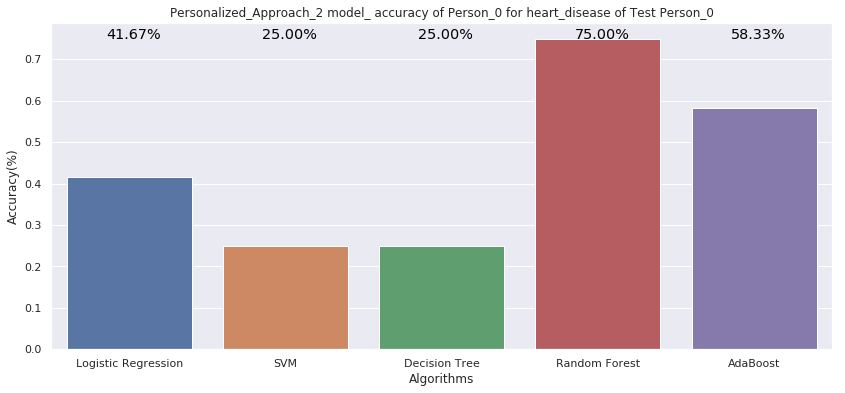

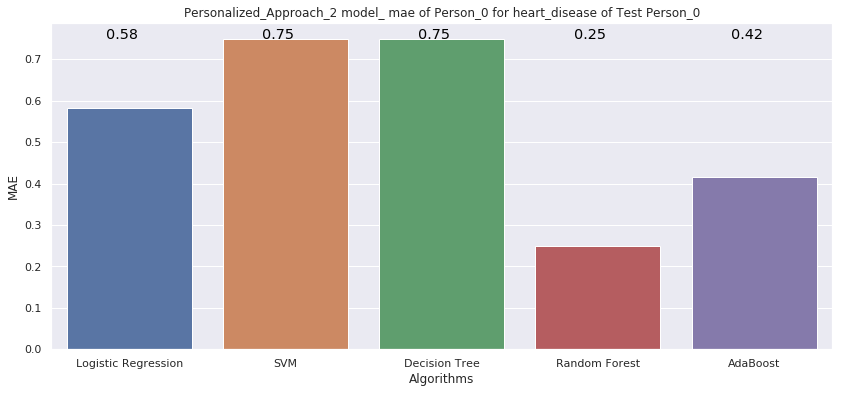

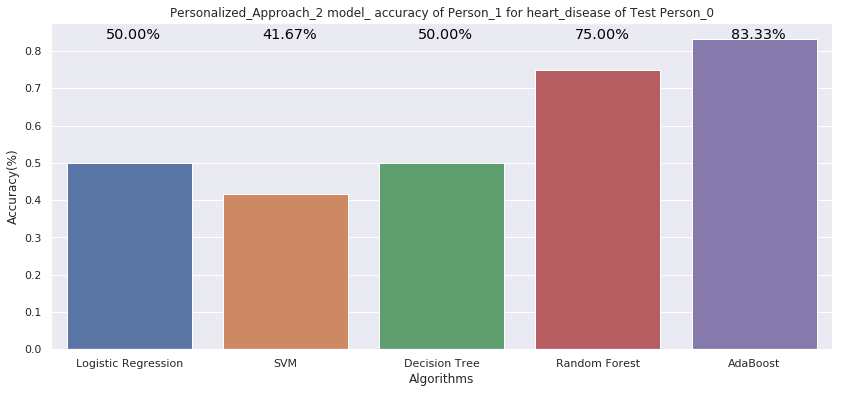

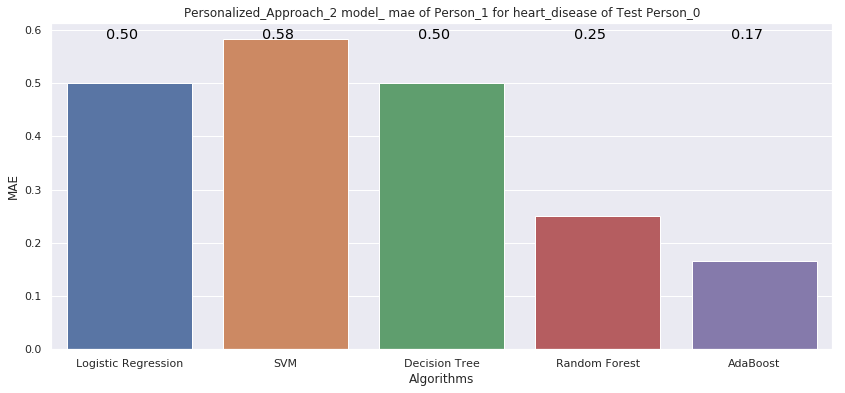

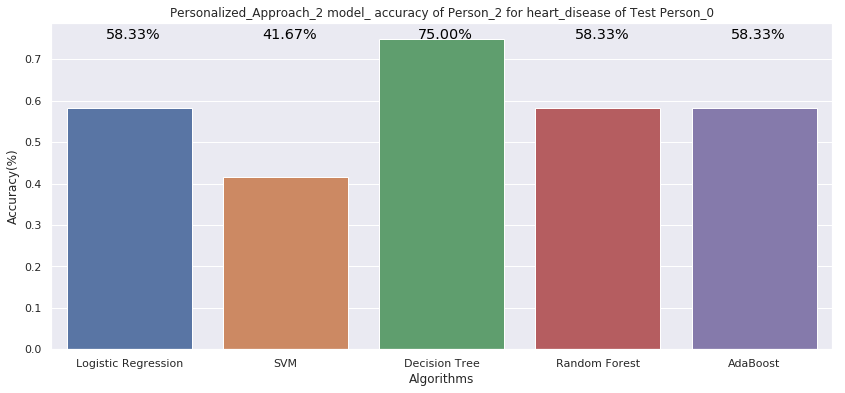

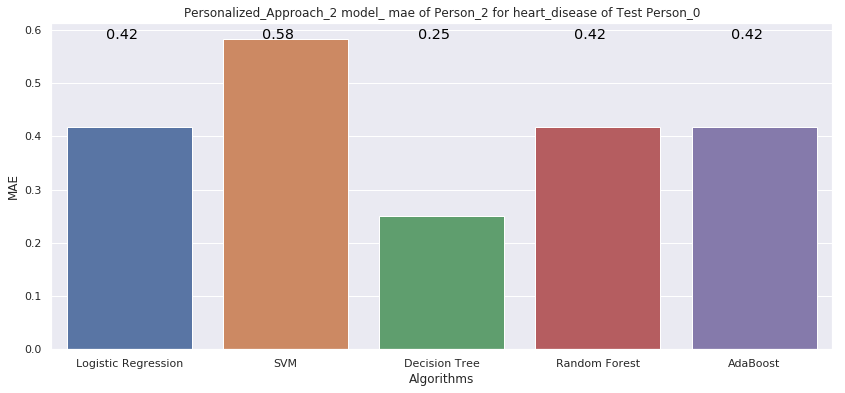

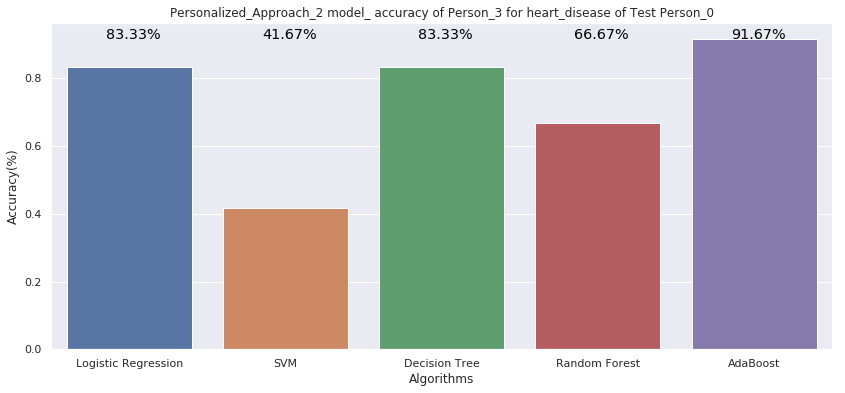

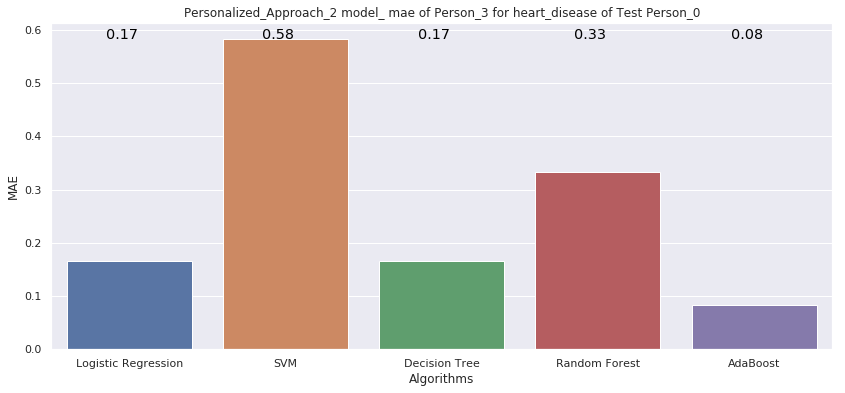

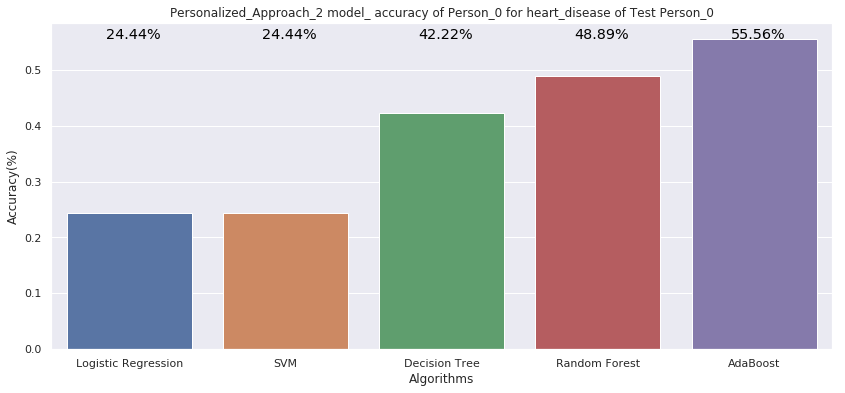

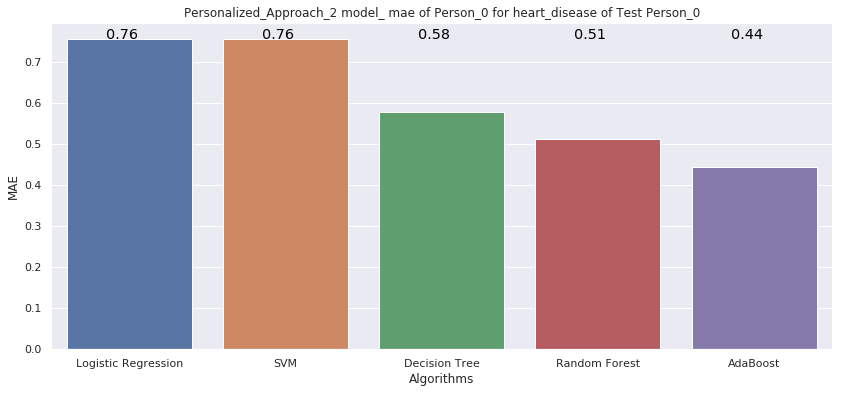

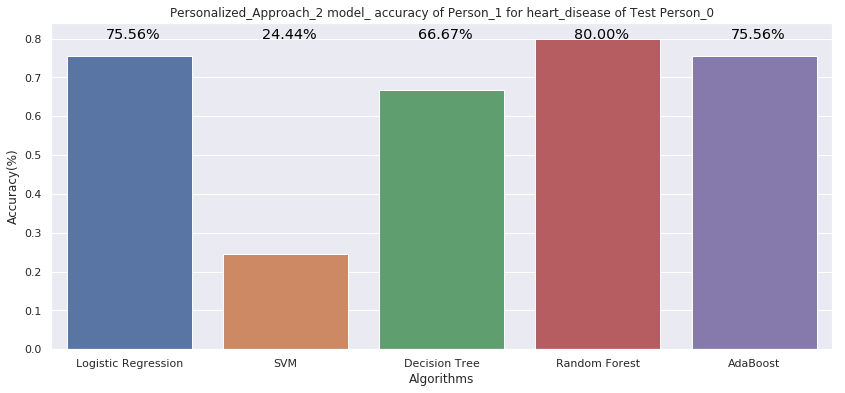

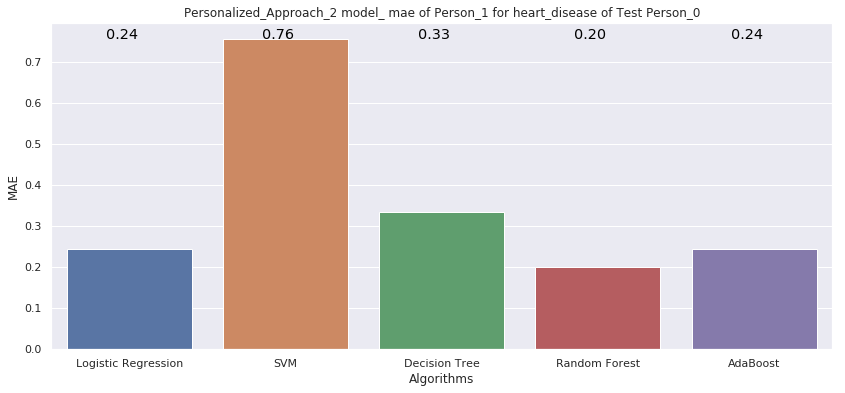

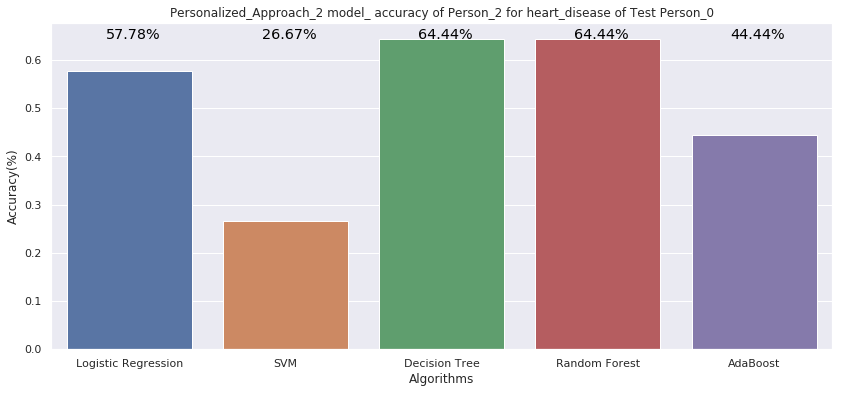

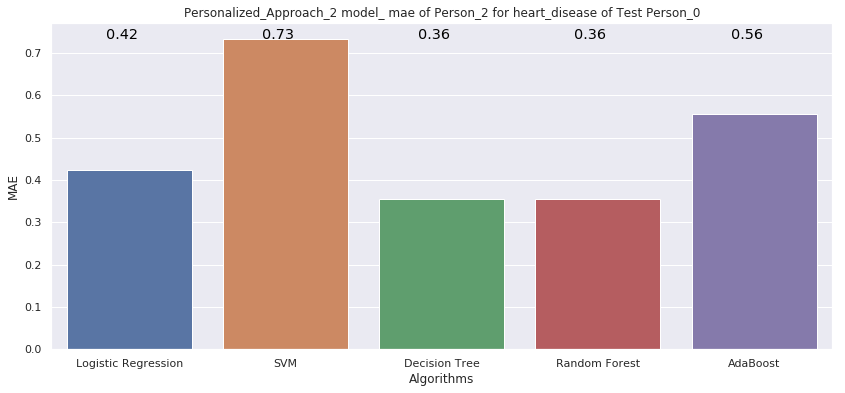

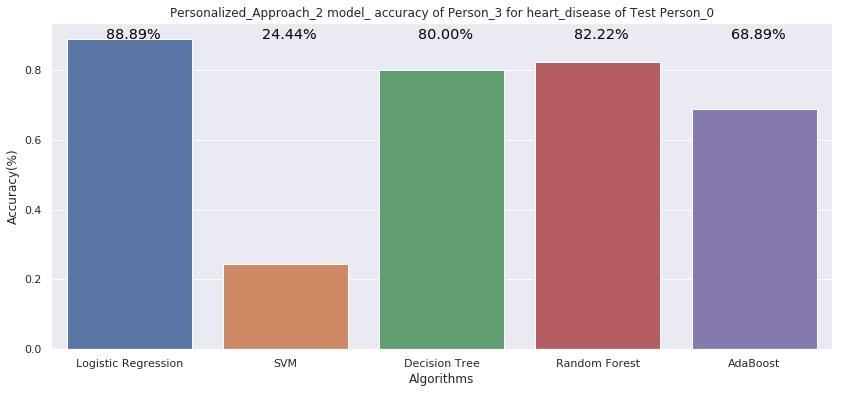

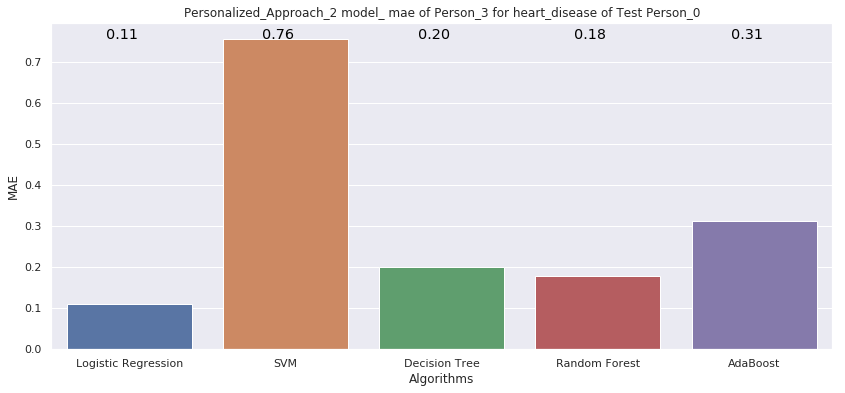

In [9]:
if __name__== "__main__":
    random.seed(2411)
    dataset=input("enter the dataset:")
    num_of_clusters = int(input("enter the number of persons:"))
    if dataset == "heart_disease":
        df = pd.read_csv("heart.csv")
        df=heart_disease(df)
    elif dataset == "breast_cancer":
        df = pd.read_csv("data.csv")
        df=breast_cancer(df)
    elif dataset == "liver_disease":
        df = pd.read_csv("indian_liver_patient.csv")
        df=liver_disease(df)
    elif dataset == "thyroid":  
        df = pd.read_csv("thyroid_dataset.csv")
    elif dataset == "diabetes":  
        df = pd.read_csv("diabetes.csv")
        
    
    test_centers, train_centers,train,test,km  = clustering(df,dataset,num_of_clusters)
    models=personalized_train(dataset,train)
    auc_val,mae,auc_final,mae_final=personalized_approach_2(test,dataset,models)
    

In [10]:
auc_val

[{'Logistic Regression': 0.4166666666666667,
  'SVM': 0.25,
  'Decision Tree': 0.25,
  'Random Forest': 0.75,
  'AdaBoost': 0.5833333333333334},
 {'Logistic Regression': 0.5,
  'SVM': 0.4166666666666667,
  'Decision Tree': 0.5,
  'Random Forest': 0.75,
  'AdaBoost': 0.8333333333333334},
 {'Logistic Regression': 0.5833333333333334,
  'SVM': 0.4166666666666667,
  'Decision Tree': 0.75,
  'Random Forest': 0.5833333333333334,
  'AdaBoost': 0.5833333333333334},
 {'Logistic Regression': 0.8333333333333334,
  'SVM': 0.4166666666666667,
  'Decision Tree': 0.8333333333333334,
  'Random Forest': 0.6666666666666666,
  'AdaBoost': 0.9166666666666666}]

In [11]:
auc_final

[{'Logistic Regression': 0.24444444444444444,
  'SVM': 0.24444444444444444,
  'Decision Tree': 0.4222222222222222,
  'Random Forest': 0.4888888888888889,
  'AdaBoost': 0.5555555555555556},
 {'Logistic Regression': 0.7555555555555555,
  'SVM': 0.24444444444444444,
  'Decision Tree': 0.6666666666666666,
  'Random Forest': 0.8,
  'AdaBoost': 0.7555555555555555},
 {'Logistic Regression': 0.5777777777777777,
  'SVM': 0.26666666666666666,
  'Decision Tree': 0.6444444444444445,
  'Random Forest': 0.6444444444444445,
  'AdaBoost': 0.4444444444444444},
 {'Logistic Regression': 0.8888888888888888,
  'SVM': 0.24444444444444444,
  'Decision Tree': 0.8,
  'Random Forest': 0.8222222222222222,
  'AdaBoost': 0.6888888888888889}]